In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn


# Any results you write to the current directory are saved as output.

In [0]:
building_own = pd.read_csv('/content/sample_data/Building_Ownership_Use.csv')

In [114]:
building_own.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [115]:
train = pd.read_csv('/content/sample_data/train.csv')
train.shape

(631761, 14)

In [0]:
building_str = pd.read_csv('/content/sample_data/Building_Structure.csv')

In [117]:
test = pd.read_csv('/content/sample_data/test.csv')
test.shape

(421175, 13)

In [0]:
#Merging the files
combine = pd.merge(building_own,building_str, on='building_id')
res_train = pd.merge(combine,train, on = 'building_id')
res_test = pd.merge(combine,test, on = 'building_id')

**Data Analyis**


In [119]:
res_train.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701
1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701
2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701
3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701
4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,0.0,0,0,0,0,0,0,0,1.0,701


In [120]:
res_train.describe()

,district_id_x,vdcmun_id_x,ward_id_x,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,...,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
count,631761.000000,631761.000000,631761.000000,631760.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,...,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,598344.000000,631761.000000
mean,26.831720,2712.186552,271224.334601,0.984075,0.112334,0.063974,0.034182,0.008391,0.000972,0.000397,...,0.123920,0.042708,0.009263,0.034602,0.069629,0.002319,0.001061,0.034853,0.316076,2712.186552
std,7.771394,777.505768,77750.671303,0.419209,0.315777,0.244706,0.181697,0.091216,0.031160,0.019928,...,0.329491,0.202197,0.095798,0.182769,0.254521,0.048099,0.032548,0.183408,0.464943,777.505768
min,7.000000,701.000000,70102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,701.000000
25%,22.000000,2242.000000,224201.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2242.000000
50%,27.000000,2703.000000,270301.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2703.000000
75%,31.000000,3119.000000,311901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3119.000000
max,51.000000,5142.000000,514209.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5142.000000


In [0]:
res_train = res_train.drop((['vdcmun_id_y','district_id_y','ward_id_y','vdcmun_id','district_id']) , axis = 1)


In [0]:
res_test = res_test.drop((['vdcmun_id_y','district_id_y','ward_id_y','vdcmun_id','district_id']) , axis = 1)

In [123]:
len(res_train)

631761

In [0]:
columns = list(res_train.columns.values)
#columns

In [125]:
res_test.shape

(421175, 52)

In [126]:
res_train.shape

(631761, 53)

In [0]:
#res_train.dtypes

**Missing Values**

In [128]:
res_train.columns[res_train.isnull().any()]

Index(['count_families', 'has_repair_started'], dtype='object')

In [129]:
miss = res_train.isnull().sum() / len(res_train)
miss = miss[miss > 0]
miss

count_families        0.000002
has_repair_started    0.052895
dtype: float64

### Visualizing Missing values

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

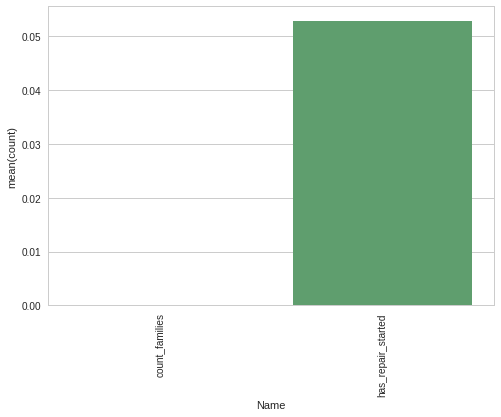

In [130]:
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

#Plotting the values

sns.set(style = "whitegrid", color_codes = True)
sns.barplot(x = 'Name', y = 'count',data = miss )
plt.xticks(rotation = 90)

### Visualizing the Target Variable

Grade 5    210825
Grade 4    152244
Grade 3    122288
Grade 2     85084
Grade 1     61320
Name: damage_grade, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

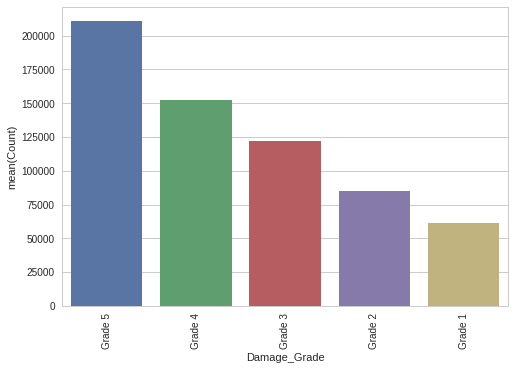

In [131]:
target = res_train['damage_grade'].value_counts()
print(target)
target = target.to_frame()
target.columns = ['Count']
target.index.names = ['Damage_Grade']
target['Damage_Grade'] = target.index 

#Plotting the Target variable
sns.set(style = 'whitegrid', color_codes = True)
sns.barplot(x = 'Damage_Grade', y = 'Count', data = target)
plt.xticks(rotation = 90)

### Univariate Analysis

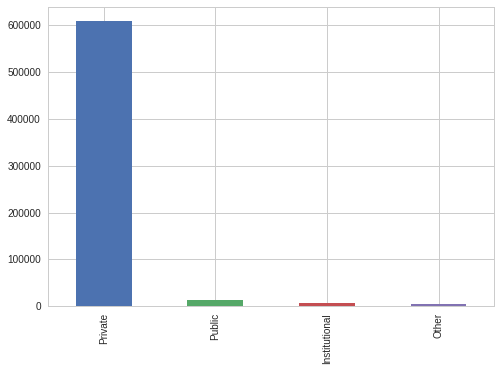

In [132]:
res_train['legal_ownership_status'].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


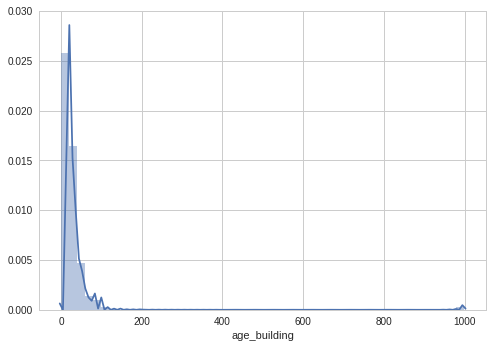

In [133]:
#Age of Building
sns.distplot(res_train['age_building'])


In [134]:
#Skewness
print("The skewness of Age of building is {}".format(res_train['age_building'].skew()))

The skewness of Age of building is 12.356283383410254


1.0     547837
0.0      50659
2.0      27771
3.0       4185
4.0        939
5.0        262
6.0         73
7.0         19
8.0          9
9.0          5
11.0         1
Name: count_families, dtype: int64


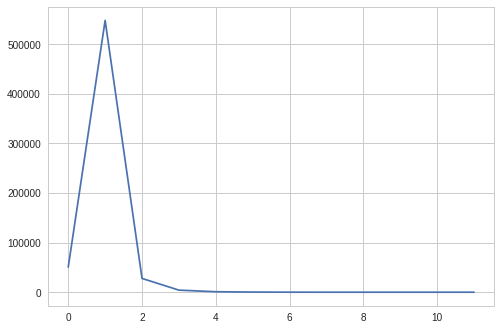

In [135]:
print(res_train['count_families'].value_counts())
res_train['count_families'].value_counts().sort_index().plot.line()

In [136]:
print("The skewness of Count of families is {}".format(res_train['count_families'].skew()))

The skewness of Count of families is 1.673681887513851


['Damaged-Repaired and used' 'Damaged-Not used' 'Damaged-Rubble clear'
 'Damaged-Rubble Clear-New building built' 'Damaged-Used in risk'
 'Damaged-Rubble unclear' 'Not damaged' 'Covered by landslide']


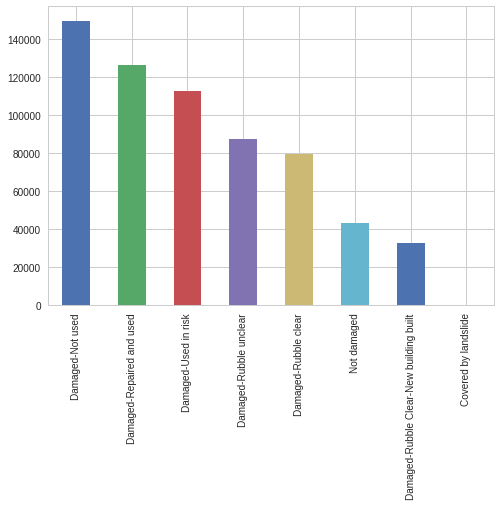

In [137]:
print(res_train['condition_post_eq'].unique())
res_train['condition_post_eq'].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


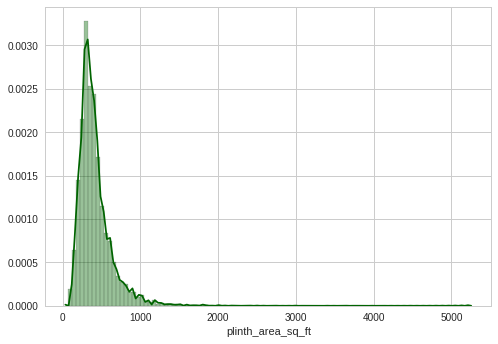

In [138]:
# fig=plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.hist(res_train['plinth_area_sq_ft'], bins = 100)
# plt.title('Plint Area Distribution')
# plt.xlabel('Plint Area in Square feet')
# plt.ylabel('Frequency')
# plt.show()

sns.distplot(res_train['plinth_area_sq_ft'],hist = True, color = 'darkgreen', bins = 100, hist_kws={'edgecolor':'black'})

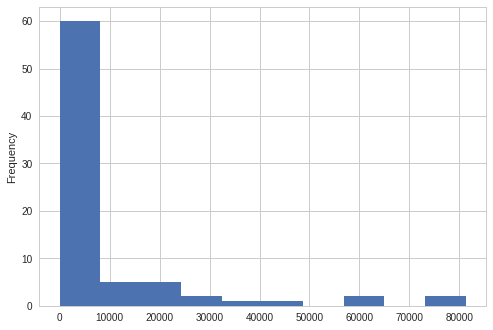

In [139]:
#len(res_train['height_ft_post_eq'].unique())
#sns.distplot(res_train['height_ft_pre_eq'].value_counts(), hist = True, color = 'darkblue', bins = 79)
res_train['height_ft_pre_eq'].value_counts().plot.hist()

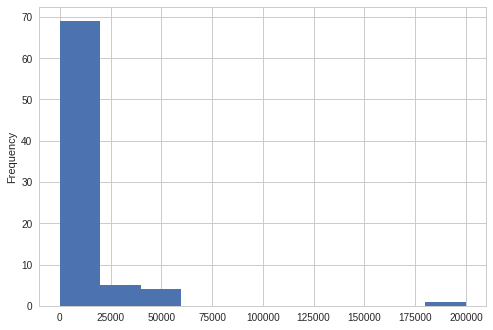

In [140]:
res_train['height_ft_post_eq'].value_counts().plot.hist()

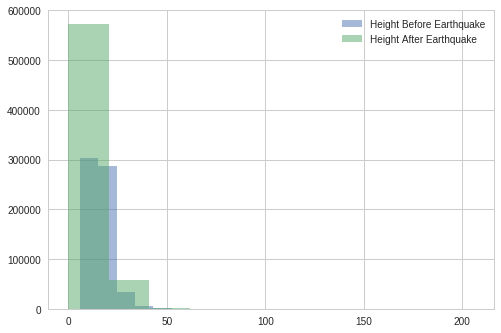

In [141]:
x1 = list(res_train['height_ft_pre_eq'])
x2 = list(res_train['height_ft_post_eq'])

csaravanan.2016@vitstudent.ac.inolors = ['#E69F00', '#56B4E9']
names = ['Height Before Earthquake', 'Height After Earthquake']



plt.hist(x1, alpha = 0.5, label = names[0])
plt.hist(x2, alpha = 0.5, label = names[1])

plt.legend()

In [142]:
res_train['area_assesed'].unique()

array(['Both', 'Building removed', 'Not able to inspect', 'Exterior',
       'Interior'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


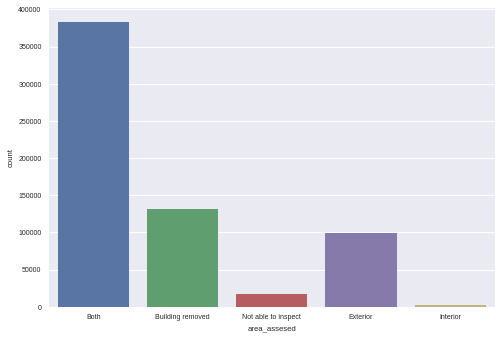

In [143]:
sns.set(font_scale=0.7)
sns.countplot(res_train['area_assesed'])

### Bivariate Plots and Statistical Tests

Converting Damage Grades to Categorical Values

In [0]:
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [145]:
clean_up = {'damage_grade' : {"Grade 1" : 1, "Grade 2" : 2, "Grade 3" : 3,"Grade 4" : 4,"Grade 5" : 5}}
train_dg = pd.DataFrame()
train_dg['damage_grade'] = res_train['damage_grade']

train_dg.replace(clean_up, inplace = True)
print(train_dg['damage_grade'].head())

res_train['damage_grade'] = train_dg['damage_grade']
res_train['damage_grade'].head()

0    2
1    3
2    3
3    4
4    3
Name: damage_grade, dtype: int64


0    2
1    3
2    3
3    4
4    3
Name: damage_grade, dtype: int64

Chi Square Test for Categorical Variables

In [0]:
cat = [c for c in res_train if res_train[c].dtypes == "object"]

In [0]:
cat.remove('building_id')

In [0]:
def ChiSquareTest(cat,res_train):
  
  for c in cat:
    print(c)
    tab = pd.crosstab(res_train['damage_grade'], res_train[c])
    stat, p, dof, expected = chi2_contingency(tab)
    print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
     
    print(" ")

  
  
    

In [149]:
ChiSquareTest(cat,res_train)

legal_ownership_status
dof=12
probability=0.950, critical=21.026, stat=8113.932
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
land_surface_condition
dof=8
probability=0.950, critical=15.507, stat=1408.392
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
foundation_type
dof=16
probability=0.950, critical=26.296, stat=138103.743
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
roof_type
dof=8
probability=0.950, critical=15.507, stat=85099.545
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
ground_floor_type
dof=16
probability=0.950, critical=26.296, stat=107177.045
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
other_floor_type
dof=12
probability=0.950, critical=21.026, stat=93978.074
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
position
dof=12
probability=0.950, critical=21.026, stat=5026.896
Dependent (reject H0)
significance=0.

All the variables with categories above 2 are significant

Relationship between Target and Binary Variables

In [150]:
cat_binary = [c for c in res_train if len(res_train[c].unique()) == 2]
cat_binary

['has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'has_geotechnical_risk_flood',
 'has_geotechnical_risk_land_settlement',
 'has_geotechnical_risk_landslide',
 'has_geotechnical_risk_liquefaction',
 'has_geotechnical_risk_other',
 'has_geotechnical_r

In [0]:
def cramers_v(x, y):
  correlation_coeff = []
  for c in cat_binary:
    confusion_matrix = pd.crosstab(res_train[c],y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    correlation_coeff.append([c,np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))])
    
  return correlation_coeff

In [152]:
cramers_v(cat_binary, res_train['damage_grade'])

[['has_secondary_use', 0.08441248217165927],
 ['has_secondary_use_agriculture', 0.05948222661881513],
 ['has_secondary_use_hotel', 0.11931727185148487],
 ['has_secondary_use_rental', 0.10798851155159755],
 ['has_secondary_use_institution', 0.04000696439985445],
 ['has_secondary_use_school', 0.02115838376096302],
 ['has_secondary_use_industry', 0.012146442641532596],
 ['has_secondary_use_health_post', 0.009057079201118534],
 ['has_secondary_use_gov_office', 0.010428605108001273],
 ['has_secondary_use_use_police', 0.001672082018154515],
 ['has_secondary_use_other', 0.024000617699672995],
 ['has_superstructure_adobe_mud', 0.10906485273848247],
 ['has_superstructure_mud_mortar_stone', 0.3516007808920147],
 ['has_superstructure_stone_flag', 0.06369988742717195],
 ['has_superstructure_cement_mortar_stone', 0.07605311792908845],
 ['has_superstructure_mud_mortar_brick', 0.09329851436407582],
 ['has_superstructure_cement_mortar_brick', 0.31581765697361813],
 ['has_superstructure_timber', 0.0821

In [153]:
ChiSquareTest(cat_binary,res_train)

has_secondary_use
dof=4
probability=0.950, critical=9.488, stat=4505.585
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_agriculture
dof=4
probability=0.950, critical=9.488, stat=2239.252
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_hotel
dof=4
probability=0.950, critical=9.488, stat=8998.122
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_rental
dof=4
probability=0.950, critical=9.488, stat=7371.281
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_institution
dof=4
probability=0.950, critical=9.488, stat=1015.168
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_school
dof=4
probability=0.950, critical=9.488, stat=286.825
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_industry
dof=4
probability=0.950, critical=9.488, stat=97

In [154]:
res_train.drop(['has_secondary_use_use_police','building_id'], axis = 1)
res_test.drop(['has_secondary_use_use_police','building_id'], axis = 1)

,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,...,area_assesed,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,7,701,70102,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
1,7,701,70103,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
2,7,701,70103,Private,1.0,0.0,0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
3,7,701,70106,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
4,7,701,70107,Private,1.0,0.0,0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
5,7,701,70107,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,0.0
6,7,701,70107,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
7,7,701,70109,Private,1.0,0.0,0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
8,7,701,70109,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
9,7,701,70109,Private,1.0,0.0,0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0


In [155]:
cont = [c for c in res_train if len(res_train[c].unique()) > 15]
cont

['building_id',
 'district_id_x',
 'vdcmun_id_x',
 'ward_id_x',
 'age_building',
 'plinth_area_sq_ft',
 'height_ft_pre_eq',
 'height_ft_post_eq']

In [0]:
indices = 0,1,2,3
cont = [i for j, i in enumerate(cont) if j not in indices]

In [157]:
cont

['age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq']

In [0]:
def hist_cont(cont, res_train):
  nd = pd.melt(res_train, value_vars = cont)
  n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
  n1 = n1.map(sns.distplot, 'value')
  
  return n1

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


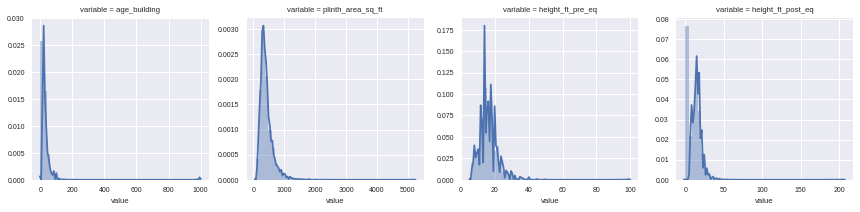

In [159]:
hist_cont(cont,res_train)

Data Transformation 

In [160]:
from scipy.stats import skew
skewed = res_train[cont].apply(lambda x: skew(x.dropna().astype(float)))
print(skewed)
skewed = skewed[skewed > 0.30]
skewed = skewed.index
res_train[skewed] = np.log1p(res_train[skewed])
res_test[skewed] = np.log1p(res_test[skewed])


age_building         12.356254
plinth_area_sq_ft     3.611024
height_ft_pre_eq      2.024236
height_ft_post_eq     0.485025
dtype: float64


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


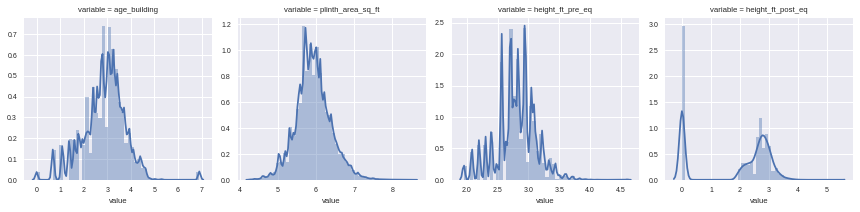

In [161]:
hist_cont(cont,res_train)

Feature Engineering

In [0]:
def calculateDistribution(cat, res_train):
  for c in cat:
    print(c)
    print((res_train[c].value_counts())/ len(res_train[c]))
    print(" ")

In [163]:
calculateDistribution(cat,res_train)

legal_ownership_status
Private          0.962939
Public           0.021294
Institutional    0.009940
Other            0.005827
Name: legal_ownership_status, dtype: float64
 
land_surface_condition
Flat              0.830164
Moderate slope    0.137870
Steep slope       0.031966
Name: land_surface_condition, dtype: float64
 
foundation_type
Mud mortar-Stone/Brick    0.841331
Bamboo/Timber             0.057590
Cement-Stone/Brick        0.054574
RC                        0.040962
Other                     0.005543
Name: foundation_type, dtype: float64
 
roof_type
Bamboo/Timber-Light roof    0.701973
Bamboo/Timber-Heavy roof    0.235493
RCC/RB/RBC                  0.062535
Name: roof_type, dtype: float64
 
ground_floor_type
Mud            0.804121
Brick/Stone    0.095558
RC             0.094446
Timber         0.003902
Other          0.001974
Name: ground_floor_type, dtype: float64
 
other_floor_type
TImber/Bamboo-Mud    0.632353
Timber-Planck        0.168374
Not applicable       0.152426
RC

In [164]:
res_train_copy = res_train
res_train_copy.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,2,0.0,0,0,0,0,0,0,0,1.0
1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,3,0.0,0,0,0,0,0,0,0,1.0
2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,3,0.0,0,0,0,0,0,0,0,1.0
3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,4,0.0,0,0,0,0,0,0,0,1.0
4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,3,0.0,0,0,0,0,0,0,0,1.0


In [165]:
res_test_copy = res_test
res_test_copy.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,area_assesed,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
1,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
2,a338a4e6b7,7,701,70103,Private,1.0,0.0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0
3,a33a6eaa3a,7,701,70106,Private,1.0,0.0,0,0,0,...,Both,0.0,0,0,0,0,0,0,0,1.0
4,a33b073ff6,7,701,70107,Private,1.0,0.0,0,0,0,...,Building removed,0.0,0,0,0,0,0,0,0,1.0


In [0]:
#Legal Ownership Status
# Private          0.962939
# Public           0.021294
# Institutional    0.009940
# Other            0.005827

res_train_copy['IsPrivate'] = (res_train_copy["legal_ownership_status"] == "Private") * 1 
res_test_copy['IsPrivate'] = (res_test_copy["legal_ownership_status"] == "Private") * 1 


In [0]:
#land_surface_condition
# Flat              0.830164
# Moderate slope    0.137870
# Steep slope       0.031966
res_train_copy['IsFlat'] = (res_train_copy["land_surface_condition"] == "Flat") * 1
res_test_copy['IsFlat'] = (res_test_copy["land_surface_condition"] == "Flat") * 1

In [0]:
# foundation_type
# Mud mortar-Stone/Brick    0.841331
# Bamboo/Timber             0.057590
# Cement-Stone/Brick        0.054574
# RC                        0.040962
# Other                     0.005543

res_train_copy['IsMudFoundation'] = (res_train_copy["foundation_type"] == "Mud mortar-Stone/Brick") * 1
res_test_copy['IsMudFoundation'] = (res_test_copy["foundation_type"] == "Mud mortar-Stone/Brick") * 1

In [0]:
# roof_type
# Bamboo/Timber-Light roof    0.701973
# Bamboo/Timber-Heavy roof    0.235493
# RCC/RB/RBC                  0.062535
res_train_copy['IsBambooRoofLight'] = (res_train_copy["roof_type"] == "Bamboo/Timber-Light roof") * 1
res_test_copy['IsBambooRoofLight'] = (res_test_copy["roof_type"] == "Bamboo/Timber-Light roof") * 1

In [0]:
# ground_floor_type
# Mud            0.804121
# Brick/Stone    0.095558
# RC             0.094446
# Timber         0.003902
# Other          0.001974
res_train_copy['IsFloorTypeMud'] = (res_train_copy["ground_floor_type"] == "Mud") * 1
res_test_copy['IsFloorTypeMud'] = (res_test_copy["ground_floor_type"] == "Mud") * 1


In [0]:
# other_floor_type
# TImber/Bamboo-Mud    0.632353
# Timber-Planck        0.168374
# Not applicable       0.152426
# RCC/RB/RBC           0.046847
res_train_copy['OtherFloorTypeMud'] = (res_train_copy["other_floor_type"] == "TImber/Bamboo-Mud") * 1
res_test_copy['OtherFloorTypeMud'] = (res_test_copy["other_floor_type"] == "TImber/Bamboo-Mud") * 1

In [0]:
# position
# Not attached       0.774600
# Attached-1 side    0.165042
# Attached-2 side    0.051155
# Attached-3 side    0.009203

res_train_copy['IsNotAttached'] = (res_train_copy["position"] == "Not attached") * 1
res_test_copy['IsNotAttached'] = (res_test_copy["position"] == "Not attached") * 1

In [0]:
# plan_configuration
# Rectangular                        0.959290
# Square                             0.021969
# L-shape                            0.014263
# Multi-projected                    0.001309
# T-shape                            0.001208
# Others                             0.000966
# U-shape                            0.000562
# Building with Central Courtyard    0.000180
# E-shape                            0.000158
# H-shape                            0.000095
res_train_copy['IsPlanConfigRectangular'] = (res_train_copy["plan_configuration"] == "Rectangular") * 1
res_test_copy['IsPlanConfigRectangular'] = (res_test_copy["plan_configuration"] == "Rectangular") * 1

In [0]:
res_train_copy['count_floors_change'] = (res_train_copy['count_floors_post_eq'] - res_train_copy['count_floors_pre_eq'])
res_train_copy['height_ft_change'] = (res_train_copy['height_ft_post_eq'] - res_train_copy['height_ft_pre_eq'])
res_test_copy['count_floors_change'] = (res_test_copy['count_floors_post_eq'] - res_test_copy['count_floors_pre_eq'])
res_test_copy['height_ft_change'] = (res_test_copy['height_ft_post_eq'] - res_test_copy['height_ft_pre_eq'])

In [175]:
res_train_copy.head()

,building_id,district_id_x,vdcmun_id_x,ward_id_x,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,...,IsPrivate,IsFlat,IsMudFoundation,IsBambooRoofLight,IsFloorTypeMud,OtherFloorTypeMud,IsNotAttached,IsPlanConfigRectangular,count_floors_change,height_ft_change
0,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,0,0,1,0,0.0
1,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,1,0,1,0,0.0
2,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,1,0,1,0,0.0
3,a338a4e71f,7,701,70103,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,0,0,1,0,0.0
4,a339d612f3,7,701,70105,Private,1.0,0.0,0,0,0,...,1,0,1,1,1,0,0,1,0,0.0


In [0]:
res_train_copy.drop(['count_floors_pre_eq', 'height_ft_pre_eq'], axis=1, inplace=True)
res_test_copy.drop(['count_floors_pre_eq', 'height_ft_pre_eq'], axis=1, inplace=True)

In [0]:
remove_columns = ["legal_ownership_status","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration","count_floors_post_eq","height_ft_post_eq"]
def dropColumns(res_train_copy,res_test_copy,remove_columns):
  for i in remove_columns:
    res_train_copy.drop([i],axis = 1, inplace = True)
    res_test_copy.drop([i],axis = 1, inplace = True)
    
  return res_train_copy,res_test_copy

In [0]:
res_train_copy, res_test_copy = dropColumns(res_train_copy,res_test_copy,remove_columns)

In [179]:
res_train_copy.shape

(631761, 51)

In [180]:
res_test_copy.shape

(421175, 50)

In [0]:
res_train_copy.drop(['building_id'], axis = 1, inplace = True)
res_test_copy.drop(['building_id'], axis = 1, inplace = True)


In [0]:
#res_train_copy.dtypes

Handling Missing Values

In [183]:
miss

,count,Name
Name,,
count_families,0.000002,count_families
has_repair_started,0.052895,has_repair_started


In [0]:
res_train_copy['count_families'].fillna(res_train_copy['count_families'].mode()[0],inplace=True)
res_test_copy['count_families'].fillna(res_test_copy['count_families'].mode()[0],inplace=True)

In [185]:
print(res_train_copy['has_repair_started'].value_counts())
print(res_test_copy['has_repair_started'].value_counts())

0.0    409222
1.0    189122
Name: has_repair_started, dtype: int64
0.0    273041
1.0    126212
Name: has_repair_started, dtype: int64


In [0]:
res_train_copy['has_repair_started'].fillna(False,inplace=True)
res_test_copy['has_repair_started'].fillna(False,inplace=True)

In [0]:
res_train_copy['has_repair_started'] = res_train_copy['has_repair_started'].astype('int64')

In [0]:
res_test_copy['has_repair_started'] = res_test_copy['has_repair_started'].astype('int64')

In [189]:
res_train_copy['area_assesed'].unique()

array(['Both', 'Building removed', 'Not able to inspect', 'Exterior',
       'Interior'], dtype=object)

In [190]:
res_train_copy['condition_post_eq'].unique()

array(['Damaged-Repaired and used', 'Damaged-Not used',
       'Damaged-Rubble clear', 'Damaged-Rubble Clear-New building built',
       'Damaged-Used in risk', 'Damaged-Rubble unclear', 'Not damaged',
       'Covered by landslide'], dtype=object)

In [0]:
y_train = res_train_copy['damage_grade']
res_train_copy.drop(['damage_grade'], axis = 1, inplace = True)

In [0]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import tree

In [0]:
res_train_one_hot = pd.get_dummies(res_train_copy)


In [0]:
res_test_one_hot = pd.get_dummies(res_test_copy)

In [0]:
res_train_one_hot.drop(["district_id_x","vdcmun_id_x","ward_id_x"],axis = 1, inplace = True)
res_test_one_hot.drop(["district_id_x","vdcmun_id_x","ward_id_x"],axis = 1, inplace = True)

In [196]:
res_train_one_hot.head()

,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,...,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,area_assesed_Both,area_assesed_Building removed,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect
0,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(res_train_one_hot, y_train)

In [0]:
y_preds_tree = clf.predict(res_test_one_hot)

In [0]:
prediction=pd.DataFrame({'building_id': test['building_id'], 'damage_grade':y_preds_tree})

In [0]:
target = {1: 'Grade 1', 2: 'Grade 2', 3: 'Grade 3', 4: 'Grade 4', 5: 'Grade 5'}
prediction.damage_grade.replace(target, inplace=True)

In [219]:
sklearn.metrics.accuracy_score(y_true['damage_grade'],prediction['damage_grade']) * 100

71.20033240339527

In [0]:
rf = RandomForestClassifier(n_estimators=200, min_samples_leaf = 2)

In [198]:
rf.fit(res_train_one_hot, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
rf.score(res_train_one_hot, y_train)*100

81.90391619615646

In [200]:
feature_imp = pd.Series(rf.feature_importances_,index=res_train_one_hot.columns).sort_values(ascending=False)
feature_imp.head()

height_ft_change                      0.208800
count_floors_change                   0.126005
condition_post_eq_Not damaged         0.091257
area_assesed_Building removed         0.065183
condition_post_eq_Damaged-Not used    0.059226
dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


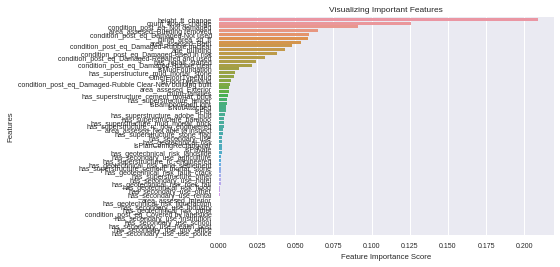

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [0]:
ypreds = rf.predict(res_test_one_hot)

In [0]:
y_true = pd.read_csv('/content/sample_data/f094981623-submission.csv')

In [207]:
y_true.head()

,building_id,damage_grade
0,a3380c4f75,Grade 3
1,a338a4e653,Grade 5
2,a338a4e6b7,Grade 5
3,a33a6eaa3a,Grade 3
4,a33b073ff6,Grade 5


In [0]:
target = {1: 'Grade 1', 2: 'Grade 2', 3: 'Grade 3', 4: 'Grade 4', 5: 'Grade 5'}
prediction.damage_grade.replace(target, inplace=True)

In [0]:
prediction=pd.DataFrame({'building_id': test['building_id'], 'damage_grade':ypreds})

In [213]:
sklearn.metrics.accuracy_score(y_true['damage_grade'],prediction['damage_grade']) * 100

84.09046120971094

In [0]:
prediction.to_csv('submission.csv', index=False)

In [211]:
prediction.head()

,building_id,damage_grade
0,a3380c4f75,Grade 3
1,a338a4e653,Grade 5
2,a338a4e6b7,Grade 5
3,a33a6eaa3a,Grade 3
4,a33b073ff6,Grade 5
